In [1]:
from datetime import datetime
from lassort import load, localAssortF
import numpy as np
import pandas as pd

In [5]:
networkfile = '../../../problem_sets/2/facebook100txt/Wellesley22.txt'
metadatafile = '../../../problem_sets/2/facebook100txt/Wellesley22_attr.txt'

m = pd.read_csv(metadatafile,sep="\t")

In [7]:
m.dorm.value_counts()

0     962
40    152
33    146
41    143
39    142
42    140
48    136
32    132
34    130
46    126
47    125
44    110
37    110
31    103
35    102
43     69
36     38
49     32
50     20
53     13
38     13
45     12
52      9
51      4
54      1
Name: dorm, dtype: int64

In [9]:
m.major.value_counts().head(30)

0      601
63     283
95     216
76     204
65     186
96     172
51     146
90     103
75      93
50      73
107     61
52      53
102     45
46      45
62      42
86      41
47      35
103     32
67      32
66      31
55      28
89      27
43      27
60      27
92      25
94      25
108     23
83      20
91      20
44      19
Name: major, dtype: int64

In [10]:
m

,id,status,gender,major,dorm,year
0,1,1,1,0,44,2008
1,2,1,1,96,0,2006
2,3,1,1,63,50,2006
3,4,1,1,90,40,2008
4,5,1,1,90,32,2007
...,...,...,...,...,...,...
2965,2966,1,0,94,0,2007
2966,2967,1,1,94,0,2006
2967,2968,1,1,44,0,2007
2968,2969,2,1,63,43,2005


In [11]:
# columns[4] is dorm
col = 4

start = datetime.now()
E, M = load(
    networkfile, 
    metadatafile, 
    zero_index=1, 
    meta_col=col,
    header=True,
    reindex=True,
    missing_value=0
)

assortM, assortT, Z = localAssortF(E,M,pr=np.arange(0,1,0.1))
end = datetime.now()
print(f"Ran multiscale mixing for dorms in {(end-start).total_seconds()} seconds.")

Ran multiscale mixing for dorms in 46.974258 seconds.


In [13]:
pd.Series(assortT).describe()

count    2970.000000
mean        0.165902
std         0.181502
min        -0.047450
25%         0.072961
50%         0.090261
75%         0.156527
max         0.835910
dtype: float64

<AxesSubplot:ylabel='Frequency'>

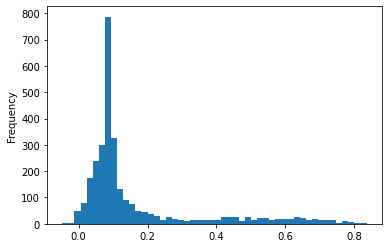

In [14]:
pd.Series(assortT).plot(kind='hist', bins=50)

In [25]:
dorms = pd.DataFrame([m.dorm.values, assortT]).T
dorms.columns = ["dorm", "T"]

assort_by_dorm = dorms.groupby("dorm")[["T"]].mean()
assort_by_dorm["n"] = dorms.dorm.value_counts()

In [34]:
assort_by_dorm.drop(0).corr()

,T,n
T,1.000000,0.718691
n,0.718691,1.000000


<AxesSubplot:xlabel='n', ylabel='T'>

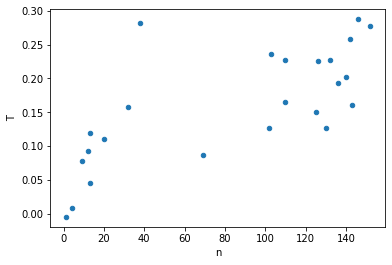

In [35]:
assort_by_dorm.drop(0).plot(kind="scatter", x="n", y="T")

In [39]:
def assort_vs_freq(col_name, col_i, m):
    start = datetime.now()
    E, M = load(
        networkfile, 
        metadatafile, 
        zero_index=1, 
        meta_col=col_i,
        header=True,
        reindex=True,
        missing_value=0
    )

    assortM, assortT, Z = localAssortF(E,M,pr=np.arange(0,1,0.1))
    end = datetime.now()
    print(f"Ran multiscale mixing for {col_name} in {(end-start).total_seconds()} seconds.")
    
    grps = pd.DataFrame([m[col_name].values, assortT]).T
    grps.columns = [col_name, "T"]

    assort = grps.groupby(col_name)[["T"]].mean()
    assort["n"] = grps[col_name].value_counts()
    return assort.drop(0)


majors = assort_vs_freq("major", 3, m)
majors.corr()

Ran multiscale mixing for major in 69.367847 seconds.


,T,n
T,1.000000,0.833506
n,0.833506,1.000000


<AxesSubplot:xlabel='n', ylabel='T'>

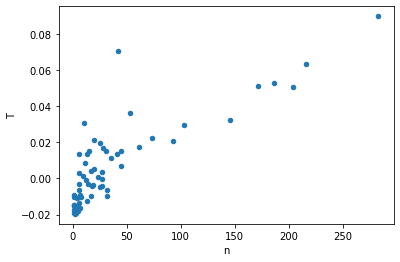

In [40]:
majors.plot(kind="scatter", x="n", y="T")